In [2]:
import pymc as pm
from pymc.model.transform.conditioning import do, observe

In [4]:
with pm.Model(coords_mutable={"i": [0]}) as m:
    season = pm.Bernoulli('season',p=0.5,dims='i')
    u1 = pm.Normal('u1',0,3)
    u2 = pm.Normal('u2')
    u3 = pm.Normal('u3',0,0.3)
    u4 = pm.Normal('u4',0,1)

    b1 = 2
    b2 = -3
    b3 = 3
    b4 = 3
    b5 = 2

    rain = pm.Bernoulli('rain',p=pm.invlogit(b1*season + u1),dims='i')
    sprinkler = pm.Bernoulli('sprinkler',p=pm.invlogit(b2*season + u2),dims='i')
    wet = pm.Bernoulli('wet',p=pm.invlogit(b3*sprinkler + b4*rain + u3),dims='i')
    slippery = pm.Bernoulli('slippery',p=pm.invlogit(b5*wet + u4),dims='i')

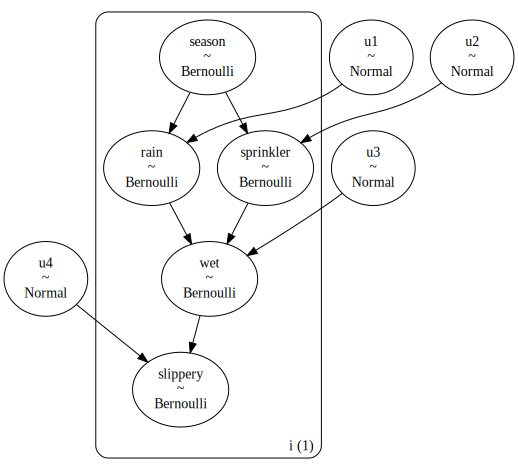

In [5]:
m.to_graphviz()

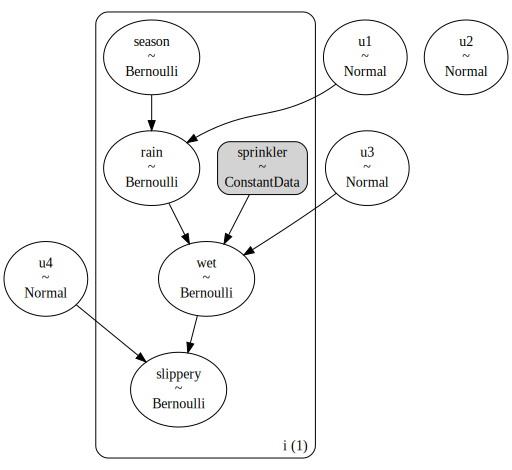

In [6]:
m_do = do(m, {"sprinkler": [1]})
m_do.to_graphviz()